In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
def g_density(x, mu=0.0, sigma=0.1):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2 * sigma**2))

In [3]:
def get_noise(size, mu, sigma_start, sigma_end):
    sigmas = np.random.uniform(sigma_start, sigma_end, size)
    noise = [np.random.normal(mu, s) for s in sigmas]
    return np.array(noise)

In [4]:
def generate_normal(size=100, mu=0.0, sigma=0.5, confidence=0.9):
    start, end = norm.interval(confidence, loc=mu, scale=sigma)
    step = (end - start) / (size)
    x = np.arange(start, end, step)
    noise = get_noise(x.shape[0], mu, min(0.01 * sigma, 0.01),min(0.15 * sigma, 0.05))
#     noise = get_noise(x.shape[0], mu, 0.01, 0.05)
#     y = g_density(x, mu=mu, sigma=sigma) + noise
    y = g_density(x, mu=mu, sigma=sigma)
    sol = np.array([x, y, y + noise])
    return sol

In [5]:
t = generate_normal(sigma=0.3)
print(t.shape)

(3, 100)


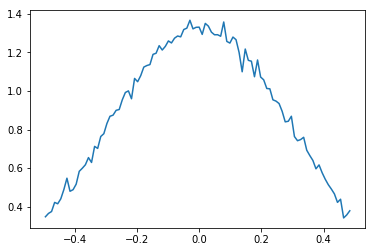

In [6]:
plt.plot(t[0], t[2])

In [7]:
t = generate_normal( sigma=1)
print(t.shape)

(3, 101)


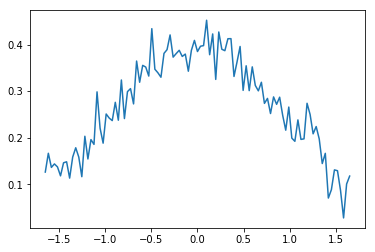

In [10]:
plt.plot(t[0], t[2])

In [11]:
t[0, 0]

-1.6448536269514729

# Dset Generation

In [12]:
sigmas = [0.5, 0.4, 0.3, 0.2]
sizes = [100 for _ in range(len(sigmas))]
dset = None
vizu_set = None
for i in range(len(sigmas)):
    new_data = generate_normal(size=sizes[i], sigma=sigmas[i])
    if dset is None:
        vizu_set = new_data.copy()
        new_data = new_data.T
        np.random.shuffle(new_data)
        dset = new_data.T
        continue
        
    vizu_set = np.concatenate((vizu_set, new_data.copy()), axis=1)
    new_data = new_data.T
    np.random.shuffle(new_data)
    dset = np.concatenate((dset, new_data.T), axis=1)


In [13]:
dset.shape

(3, 401)

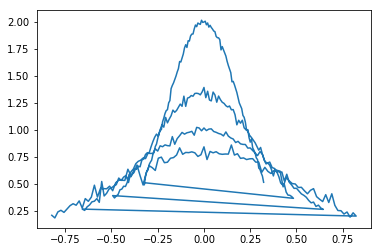

In [15]:
plt.plot(vizu_set[0], vizu_set[2])

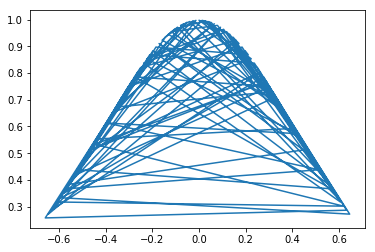

In [16]:
plt.plot(dset[0,101:200], dset[1,101:200])

# Save Data

In [18]:
data_file = "../data/data-4-100.csv"
label_file = "../data/label-4-100.csv"
label_noised_file = "../data/label-noised-4-100.csv"

np.savetxt(data_file, dset[0,:], delimiter=",")
np.savetxt(label_file, dset[1,:], delimiter=",")
np.savetxt(label_noised_file, dset[2,:], delimiter=",")